In [1]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2
from src.misc import load_processed_dataset, split_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Results

In [15]:
df = load_processed_dataset("aapl")
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'log_open', 'log_high', 'log_low', 'log_close', 'log_volume  ',
       'Close Forecast', 'close_t-1', 'close_t-2', 'close_t-3', 'close_t-4',
       'close_t-5', 'pct_change', 'log_return', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'upper_band',
       'middle_band', 'lower_band', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_10',
       'EMA_20', 'EMA_50', 'ADX', 'aroon_down', 'aroon_up', 'macd',
       'macdsignal', 'macdhist', 'RSI_14', 'slow_k', 'slow_d', 'williams_r',
       'AD', 'OBV', 'NATR', 'TRANGE', 'fed_funds_rate', 'log_fed_funds_rate',
       '^N225', 'log_^N225', '^IXIC', 'log_^IXIC', '^FTSE', 'log_^FTSE',
       '^SPX', 'log_^SPX', '^DJI', 'log_^DJI'],
      dtype='object')

R^2: 0.9052672443982556
MSE: 10.864161256797766
RMSE: 3.2960827138889837
MAE: 2.503579518151662
MAPE: 1.7006109697709257


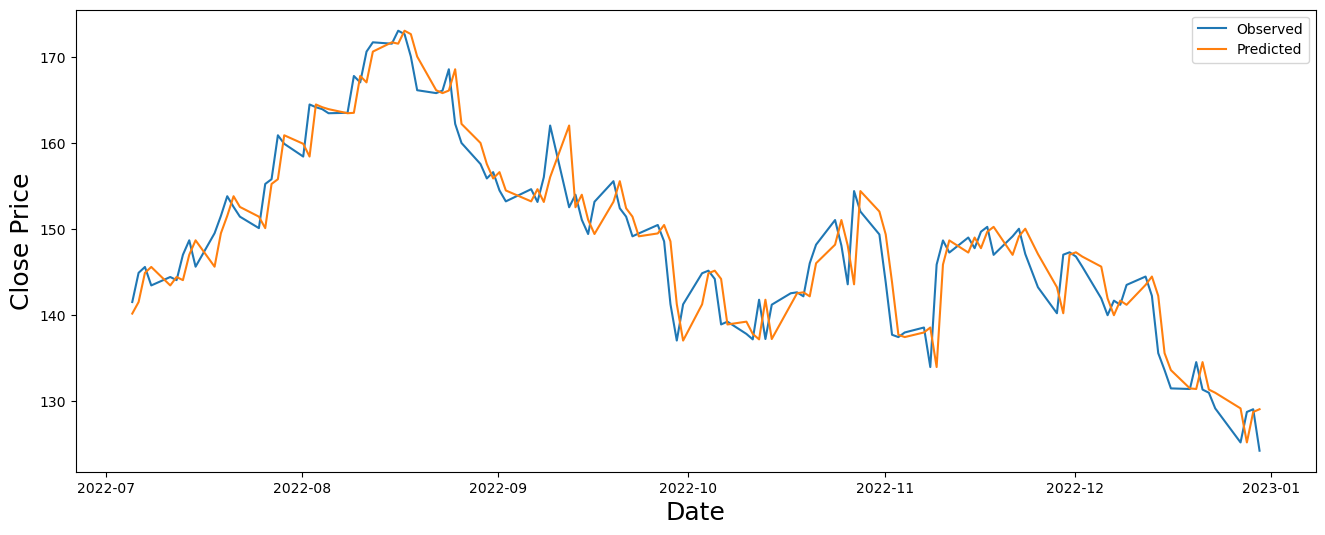

In [6]:
from src.models.Baseline.evaluate import eval
y_pred, y_true = eval()

R^2: 0.8323455756015967
MSE: 19.22697899485912
RMSE: 4.384857921855521
MAE: 3.4930199278154803
MAPE: 2.338658436812514


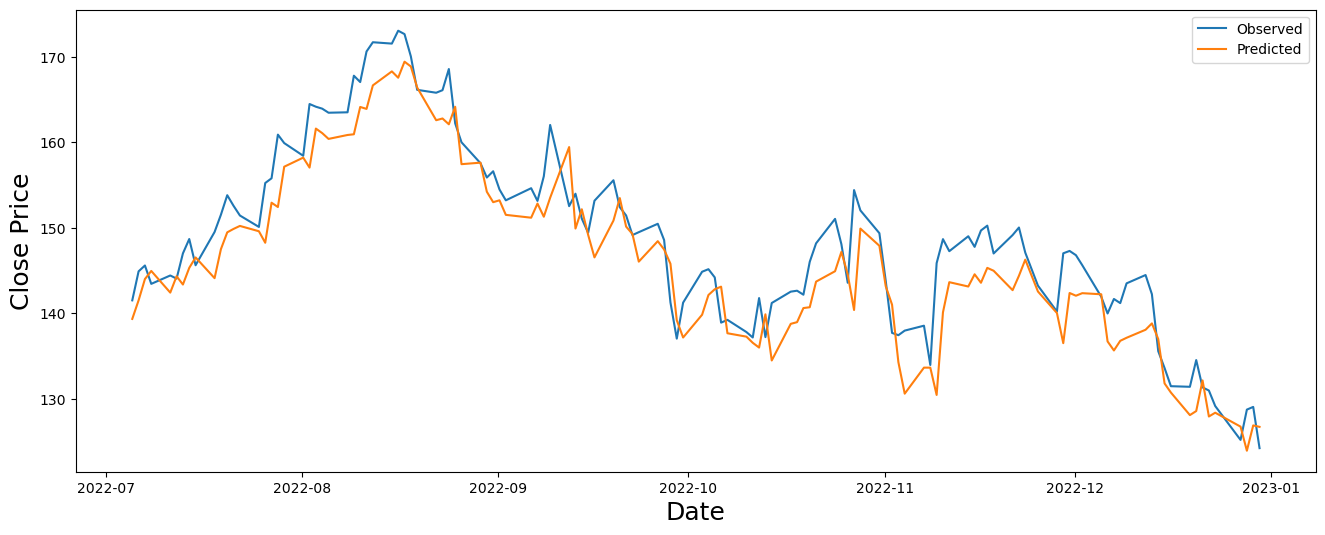

In [13]:
from src.models.Linear.evaluate import eval
y_pred, y_true = eval()

In [7]:
import mlflow
def load_latest_model_from_experiment(experiment_name):
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    runs = mlflow.search_runs(
        experiment_ids=[mlflow.get_experiment_by_name(experiment_name).experiment_id],
        order_by=["start_time desc"],
    )
    assert not runs.empty, "No runs found in specified experiment."
    latest_run_id = runs.iloc[0]["run_id"]
    model = mlflow.pyfunc.load_model(f"runs:/{latest_run_id}/models")
    return model


In [8]:
model = load_latest_model_from_experiment("linear")

In [11]:
model.predict(y_true.values)

MlflowException: Failed to enforce schema of data '[141.51280212 144.90905762 145.59225464 143.44363403 144.4238739
 144.05752563 147.00817871 148.69145203 145.6219635  149.51325989
 151.53315735 153.82041931 152.5728302  151.44404602 150.10736084
 155.2462616  155.80075073 160.90994263 159.91975403 158.43453979
 164.49429321 164.17744446 163.94941711 163.47346497 163.52302551
 167.80644226 167.06280518 170.64222717 171.72299194 171.56433105
 173.07144165 172.67485046 170.06713867 166.15060425 165.81344604
 166.11091614 168.58973694 162.23402405 160.01303101 157.56394958
 155.88824463 156.62200928 154.49017334 153.22103882 154.63893127
 153.15164185 156.03700256 162.04563904 152.53691101 153.99443054
 151.0793457  149.42347717 153.17144775 155.57093811 152.41790771
 151.44621277 149.15576172 149.4928894  150.47450256 148.57077026
 141.27310181 137.02935791 141.24337769 144.86245728 145.15988159
 144.19812012 138.90335083 139.2305603  137.80273438 137.16818237
 141.77879333 137.20783997 141.20372009 142.53236389 142.64141846
 142.17539978 146.02255249 148.18408203 151.04959106 148.08493042
 143.57347107 154.42079163 152.04112244 149.37390137 143.80149841
 137.70359802 137.43545532 137.97175598 138.54782104 133.94940186
 145.86749268 148.67819214 147.26786804 149.01585388 147.77438354
 149.69122314 150.25732422 146.99971008 149.15489197 150.03884888
 147.09902954 143.23558044 140.20640564 147.01957703 147.29766846
 146.80108643 145.62915039 141.93453979 139.97798157 141.67630005
 141.18965149 143.50376892 144.47706604 142.23248291 135.56828308
 133.59185791 131.46646118 131.39694214 134.52545166 131.3274231
 130.95996094 129.14245605 125.17967987 128.72529602 129.0431366
 124.21630859]' with schema '['Open': double (required), 'High': double (required), 'Low': double (required), 'Close': double (required), 'Volume': long (required), 'Dividends': double (required), 'Stock Splits': double (required), 'Close_T-1': double (required), 'Close_T-2': double (required), 'Close_T-5': double (required), 'SMA_10': double (required), 'SMA_20': double (required), 'SMA_50': double (required), 'EMA_10': double (required), 'EMA_20': double (required), 'EMA_50': double (required), 'RSI_14': double (required), 'upper_band': double (required), 'middle_band': double (required), 'lower_band': double (required), 'macd': double (required), 'macdsignal': double (required), 'macdhist': double (required), 'OBV': double (required), 'ADX': double (required), 'AD': double (required), 'Aroon_down': double (required), 'Aroon_up': double (required), 'SlowK': double (required), 'SlowD': double (required), 'Williams %R': double (required), 'pct_change': double (required), 'dayofweek': long (required), 'quarter': long (required), 'month': long (required), 'year': long (required), 'dayofyear': long (required), 'dayofmonth': long (required), 'weekofyear': long (required), 'S&P Close': double (required)]'. Error: Model is missing inputs ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Close_T-1', 'Close_T-2', 'Close_T-5', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_10', 'EMA_20', 'EMA_50', 'RSI_14', 'upper_band', 'middle_band', 'lower_band', 'macd', 'macdsignal', 'macdhist', 'OBV', 'ADX', 'AD', 'Aroon_down', 'Aroon_up', 'SlowK', 'SlowD', 'Williams %R', 'pct_change', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'S&P Close']. Note that there were extra inputs: [0]